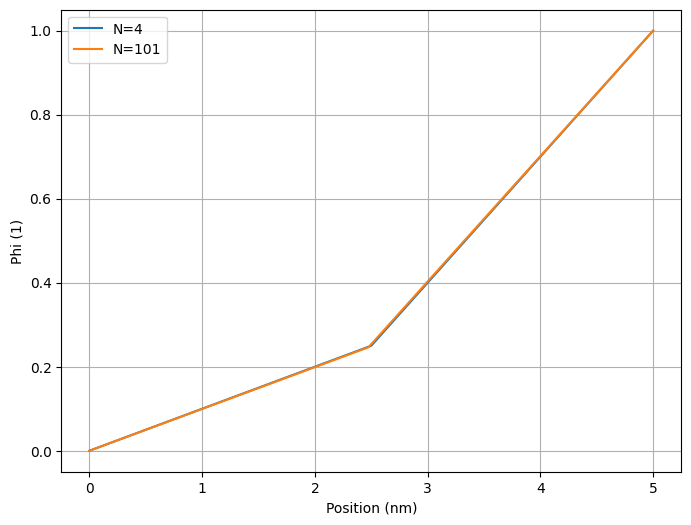

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, e1, e2 = 5, 11.7, 3.9

def set_matrix(N, dx):
    """행렬 A와 벡터 b를 설정하는 함수"""
    A = np.zeros((N+1, N+1))
    b = np.zeros((N+1, 1))

    A[0, 0] = 1
    b[0] = 0

    middle_index = int((a/2) / dx)  # 항상 같은 위치에서 전환하도록

    for ii in range(1, N):
        if ii == middle_index:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e1, -e1 - e2, e2
        elif ii < middle_index:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e1, -2 * e1, e1
        else:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e2, -2 * e2, e2

    A[N, N] = 1
    b[N] = 1

    return A, b

def solve_potential(N):
    dx = a / N
    x = np.linspace(0, a, N+1)
    A, b = set_matrix(N, dx)
    phi = np.linalg.solve(A, b)
    return x, phi

N_values = [4,101]
plt.figure(figsize=(8, 6))

for N in N_values:
    x, phi = solve_potential(N)
    plt.plot(x, phi, label=f"N={N}")

plt.xlabel('Position (nm)')
plt.ylabel('Phi (1)')
plt.grid()
plt.legend()
plt.show()
